# Import Libraries

In [23]:
# For Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For Data manupulation
import pandas as pd
import numpy as np
# For Stats
import statistics
from scipy import stats

# For Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc







## LOAD DATASET

In [298]:

df_train= pd.read_csv("D:/projects/Project/Train_data.csv")
df_test= pd.read_csv("D:/projects/Project/Test_data.csv")


In [13]:
df_train.head()
#df_test.head()

,state,account_len,area_code,phone_num,international_plan,voice_mail_plan,number_vmail_msg,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_nightcharge,total_intl_minutes,total_intl_calls,total_intl_charge,num _customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [299]:
df_train.info() 
print('_'*60)
df_test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                          3333 non-null object
account_len                    3333 non-null int64
area_code                      3333 non-null int64
phone_num                      3333 non-null object
international_plan             3333 non-null object
voice_mail_plan                3333 non-null object
number_vmail_msg               3333 non-null int64
total_day_minutes              3333 non-null float64
total_day_calls                3333 non-null int64
total_day_charge               3333 non-null float64
total_eve_mnts                 3333 non-null float64
total_eve_calls                3333 non-null int64
total_eve_charge               3333 non-null float64
total_night_minutes            3333 non-null float64
total_night_calls              3333 non-null int64
total_nightcharge              3333 non-null float64
total_intl_minutes             3333 non-null float64
total_in

In [300]:
df_train["num _customer_service_calls"]= df_train["num _customer_service_calls"].astype("O")
df_train["area_code"]= df_train["area_code"].astype("O")
df_train["number_vmail_msg"]= df_train["number_vmail_msg"].astype("O")

In [301]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_len,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_mnts,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00
total_nightcharge,3333.0,9.039325,2.275873,1.04,7.52,9.05,10.59,17.77


## UNivariate Analysis

## Lets Look at Target variable first

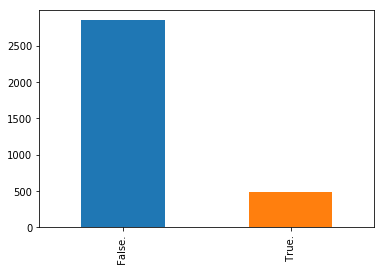

In [306]:
df_train['Churn'].value_counts(normalize= True)
df_train['Churn'].value_counts().plot(kind= "bar")

## OUTLIER ANALYSIS
## since upto 3 std dataset contains 99% of the total data so considering outlier remove all the values z > 3
## As we can see after removing outliers total datasize is 3311 means ~ 99% of the dataset which support above assumption

In [15]:
num_val= df_train._get_numeric_data().columns
for i in num_val:
    z= np.abs(stats.zscore(df_train.loc[:, i]))
    #print(z)
    
#df_train= df_train[(z < 3).reshape(-1, 1).all(axis= 1)]

df_train.shape

(3311, 21)

# 1. EXPLORATARY DATA ANALYSIS

## Provide integer code to Churn variable

In [205]:
# Provie numerical value to churn variabe
df_train["Churn"]= df_train["Churn"].astype("category")
df_train["Churn"]= df_train["Churn"].cat.codes


df_train["Churn"].dtypes

dtype('int8')

## Lets See how the output churn is distributed 

In [9]:
df_train["Churn"].value_counts(normalize= True)

 False.    0.855086
 True.     0.144914
Name: Churn, dtype: float64

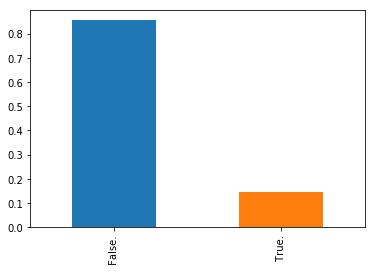

In [10]:
df_train["Churn"].value_counts(normalize= True).plot(kind= "Bar")

In [312]:
df_train.columns

Index(['state', 'account_len', 'area_code', 'phone_num', 'international_plan',
       'voice_mail_plan', 'number_vmail_msg', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_mnts',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_nightcharge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'num _customer_service_calls',
       'Churn'],
      dtype='object')

## Cateorical Analysis

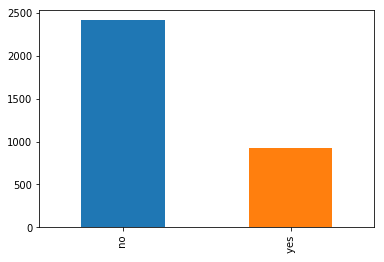

In [315]:
# VOice mail plan distribution
df_train.voice_mail_plan.value_counts(normalize= False).plot(kind= "bar")

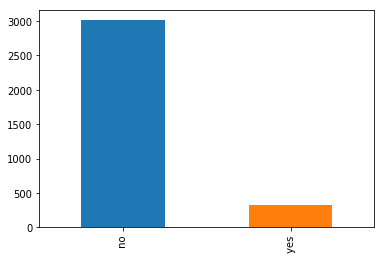

In [319]:
df_train.international_plan.value_counts().plot(kind= "bar")

# BIVARIATE ANALYSIS

In [297]:
#Check the distribution of each variable around the target variable
df_train.groupby("Churn").mean()

,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_nightcharge,total_intl_calls,total_intl_charge,state_AK,state_AL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
Churn,,,,,,,,,,,,,,,,,,,,,
0,-0.008069,-0.084801,-0.003293,-0.038072,-0.002343,-0.015351,0.024005,-0.024683,0.017321,0.025451,...,0.018381,0.016967,0.019088,0.021916,0.025097,0.022269,0.018381,0.024744,0.033581,0.023683
1,0.047361,0.497724,0.019325,0.223454,0.013753,0.090099,-0.140894,0.144874,0.006224,0.016598,...,0.016598,0.010373,0.037344,0.020747,0.010373,0.016598,0.029046,0.014523,0.020747,0.018672


# 1.1 Lets chech which State having most Churning rate
## 1.1(b) Below graph shows WV(West Virginia) having maium number of customer and CA(California) having minimum number of costumer

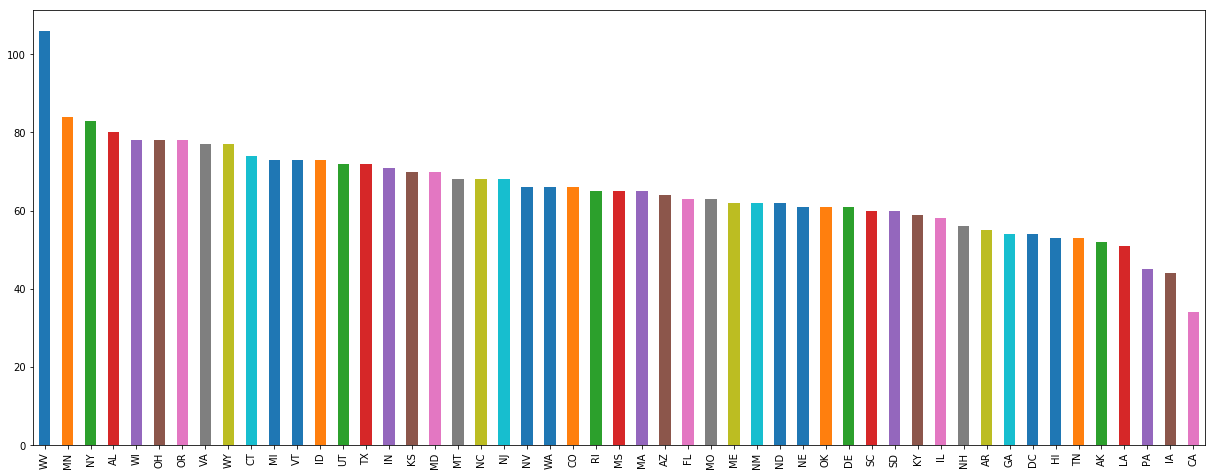

In [311]:

df_train.state.value_counts().plot(kind= "bar", figsize= (21, 8))

## 1.1(c) Which State showing maximum churning lets check statistically

In [651]:
df_train.groupby(["state", "voice_mail_plan"])[["Churn"]].mean().sort_values(by= "Churn", ascending= False).head()

,,Churn
state,voice_mail_plan,
CA,no,0.318182
SC,no,0.309524
TX,no,0.285714
MD,no,0.283019
NJ,no,0.270833


## 1.1(c.1)visualise through plot

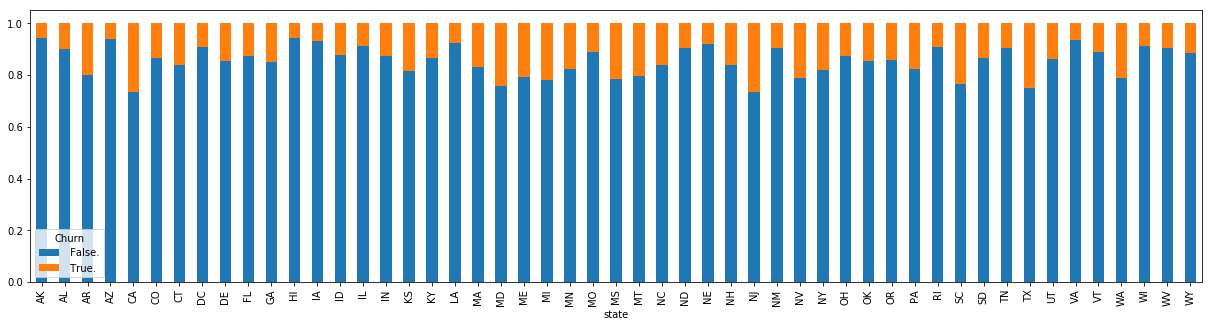

In [338]:
States= pd.crosstab(index= df_train.state, columns= df_train.Churn)

States.div(States.sum(1).astype(float), axis=0).plot(kind= "bar", figsize= (21, 5), stacked= True)

## 1.2 Churning rate with and without voice mail plan
## customer with no voice mail plan active having high churning rate

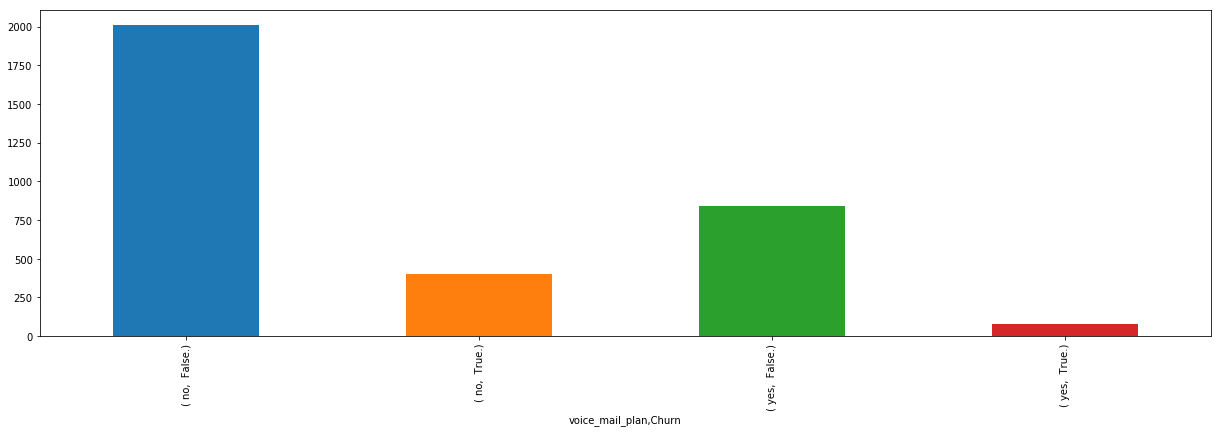

In [342]:
pd.crosstab(index= df_train["Churn"], columns= df_train["voice_mail_plan"]).unstack().plot(kind= "bar",stacked= True,  figsize= (21, 6))

In [14]:
VmailPlan= pd.crosstab(index= df_train["Churn"], columns= df_train["voice_mail_plan"])

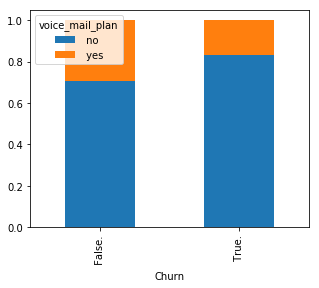

In [17]:
VmailPlan.div(VmailPlan.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True,  figsize= (5, 4))

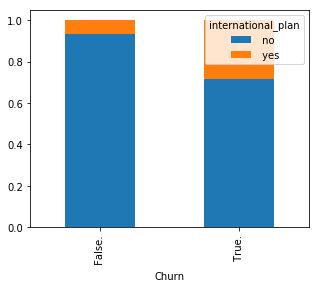

In [346]:
interPlan= pd.crosstab(index= df_train["Churn"], columns= df_train["international_plan"])

interPlan.div(interPlan.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True,  figsize= (5, 4))

## 1.3. Total day Charge is higher than evening and night charge

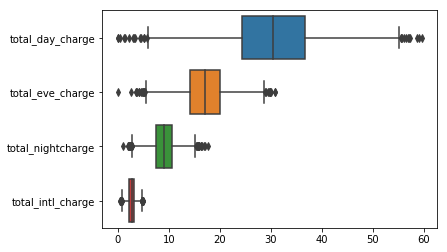

In [655]:
data= df_train.loc[:, ["total_day_charge", 'total_eve_charge', 'total_nightcharge', 'total_intl_charge']]
ax = sns.boxplot(data=data, orient="h")

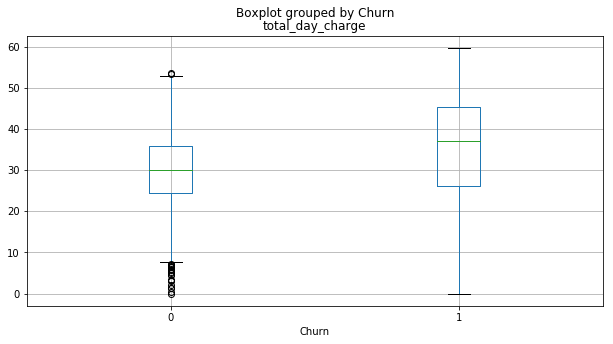

In [656]:
df_train.boxplot("total_day_charge", by= "Churn", figsize= (10, 5))
plt.show()


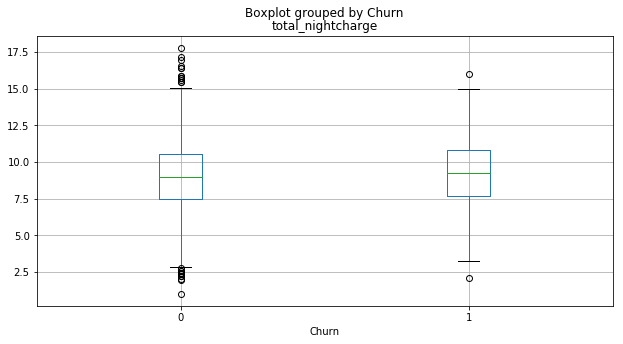

In [657]:
df_train.boxplot("total_nightcharge", by= "Churn", figsize= (10, 5))
plt.show()

## 1.4 Churning rate increasing drastically with increase in number of customer service call

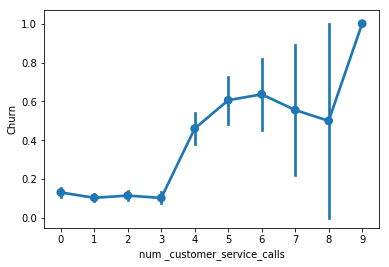

In [658]:
sns.pointplot(x="num _customer_service_calls", y="Churn", data=df_train);

# 2.Feature Selection

## 2.1 Correlation between numeric data

In [659]:
num_val_col= df._get_numeric_data()
corr_mat= num_val_col.corr()
correlations = corr_mat.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

,level_0,level_1,0
230,total_night_minutes,total_intl_minutes,0.170348
231,total_intl_minutes,total_night_minutes,0.170348
232,total_intl_minutes,total_intl_charge,1.000000
233,total_intl_charge,total_intl_minutes,1.000000
234,total_night_minutes,total_nightcharge,1.000000
235,total_nightcharge,total_night_minutes,1.000000
236,total_eve_charge,total_eve_mnts,1.000000
237,total_eve_mnts,total_eve_charge,1.000000
238,total_day_minutes,total_day_charge,1.000000
239,total_day_charge,total_day_minutes,1.000000


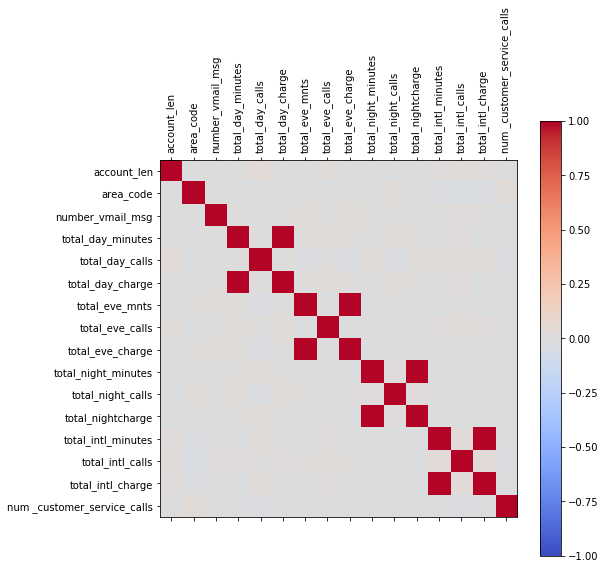

In [660]:

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
cax = ax.matshow(corr_mat,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(num_val_col.columns))
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(num_val_col.columns)
ax.set_yticklabels(num_val_col.columns)
plt.show()

# 2.2. Correlation between categorical Data

In [661]:
cat_val= df_train.select_dtypes(include= "O")
from scipy.stats import chi2_contingency
for i in cat_val:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_train['Churn'], df_train[i]))
    print(p)

state
0.0027586777906866908
area_code
0.9329642589046389
phone_num
0.49182907227007305
international_plan
1.8707279810792767e-49
voice_mail_plan
2.756626608509551e-09
number_vmail_msg
0.024717476711481834
num _customer_service_calls
3.5460750115423197e-68


In [16]:
# Remove the unwanted variable from the train data

df_train= df_train.drop(["phone_num", "area_code", "total_day_minutes", "total_eve_mnts", 'total_night_minutes', 
                        "total_intl_minutes", "account_len"], 1)

## Convert Churn variable in Yes, no format

In [191]:
df_train['Churn'] = df_train['Churn'].replace(0, 'No')
df_train['Churn'] = df_train['Churn'].replace(1, 'Yes')

In [17]:
num_val_column= df_train.select_dtypes(include= [np.number]).columns
#Standarisation
for i in num_val_column:
    print(i)
    df_train[i] = (df_train[i] - df_train[i].mean())/df_train[i].std()

total_day_calls
total_day_charge
total_eve_calls
total_eve_charge
total_night_calls
total_nightcharge
total_intl_calls
total_intl_charge


In [189]:
df_train.head()

,international_plan,voice_mail_plan,number_vmail_msg,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_nightcharge,total_intl_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,1,19,0.477386,1.566978,-0.056757,-0.070475,-0.463812,0.866501,-0.615033,...,0,0,0,0,0,0,0,0,0,0
1,0,1,20,1.124491,-0.335740,0.143907,-0.107579,0.149337,1.059699,-0.615033,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.676495,1.168056,0.495069,-1.573202,0.200432,-0.753732,0.202624,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,-1.463926,2.197254,-0.608583,-2.741990,-0.566003,-0.077537,1.020280,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0.626718,-0.241685,1.097061,-1.037508,1.069059,-0.275127,-0.615033,...,0,0,0,0,0,0,0,0,0,0


In [19]:
lis = []
for i in range(1, df_train.shape[1]):
    if(df_train.iloc[:,i].dtypes == 'object'):
         df_train.iloc[:,i] = pd.Categorical(df_train.iloc[:,i])
         df_train.iloc[:,i] = df_train.iloc[:,i].cat.codes
         df_train.iloc[:,i] = df_train.iloc[:,i].astype('object')
         lis.append(df_train.columns[i])

In [20]:
df_train.head()

,state,international_plan,voice_mail_plan,number_vmail_msg,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_nightcharge,total_intl_calls,total_intl_charge,num _customer_service_calls,Churn
0,KS,0,1,19,0.477386,1.566978,-0.056757,-0.070475,-0.463812,0.866501,-0.615033,-0.110064,1,0
1,OH,0,1,20,1.124491,-0.335740,0.143907,-0.107579,0.149337,1.059699,-0.615033,1.272942,1,0
2,NJ,0,0,0,0.676495,1.168056,0.495069,-1.573202,0.200432,-0.753732,0.202624,0.705910,0,0
3,OH,1,0,0,-1.463926,2.197254,-0.608583,-2.741990,-0.566003,-0.077537,1.020280,-1.382430,2,0
4,OK,1,0,0,0.626718,-0.241685,1.097061,-1.037508,1.069059,-0.275127,-0.615033,-0.068574,3,0


In [179]:
#df_train_onehot = df_train.copy()
df_train = pd.get_dummies(df_train, columns=['state'], prefix = ['state'])

print(df_train.head())




  international_plan voice_mail_plan number_vmail_msg  total_day_calls  \
0                  0               1               19         0.477386   
1                  0               1               20         1.124491   
2                  0               0                0         0.676495   
3                  1               0                0        -1.463926   
4                  1               0                0         0.626718   

   total_day_charge  total_eve_calls  total_eve_charge  total_night_calls  \
0          1.566978        -0.056757         -0.070475          -0.463812   
1         -0.335740         0.143907         -0.107579           0.149337   
2          1.168056         0.495069         -1.573202           0.200432   
3          2.197254        -0.608583         -2.741990          -0.566003   
4         -0.241685         1.097061         -1.037508           1.069059   

   total_nightcharge  total_intl_calls    ...     state_SD state_TN state_TX  \
0           

## MODELING part-1(Without sampling the target variable)

In [25]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [206]:
#Train test split

x= df_train.drop(["Churn"], axis= 1)
y= df_train.Churn
print(x.shape, y.shape)

(3311, 63) (3311,)


In [207]:
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.2, random_state= 1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2648, 63) (2648,) (663, 63) (663,)


## Decision Tree

In [208]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

In [198]:
C50_Predictions = C50_model.predict(X_test)
print(np.unique(C50_Predictions))          # Check whether predicting both minority & mejority or ignoring minority class


['No' 'Yes']


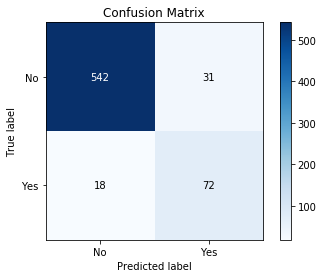

In [200]:
CM = pd.crosstab(Y_test, C50_Predictions)
skplt.metrics.plot_confusion_matrix(Y_test, C50_Predictions, normalize=False)

In [218]:
#accuracy_score(Y_test, C50_Predictions)*100                  
TP= 72
TN= 542
FP= 31
FN= 18
((TP+TN)*100)/(TP+TN+FP+FN)           #92.60

92.60935143288084

In [219]:
#False Negative rate     #20%
(FN*100)/(FN+TP)
#18/(18+72)

20.0

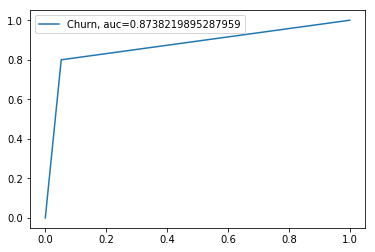

In [211]:
from sklearn import metrics
C50_Predictions_prob = C50_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, C50_Predictions_prob)
auc = metrics.roc_auc_score(Y_test, C50_Predictions_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend()

## Random Forest Classification

In [212]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 2000).fit(X_train, Y_train)
RF_Predictions = RF_model.predict(X_test)

36.666666666666664

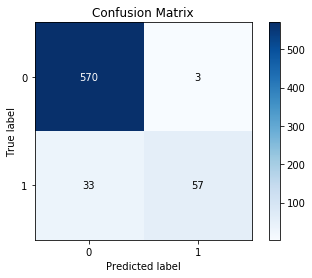

In [222]:
CM = pd.crosstab(Y_test, RF_Predictions)
skplt.metrics.plot_confusion_matrix(Y_test, RF_Predictions, normalize=False)
TP= 57
TN= 570
FN= 33
FP= 3

((TP+TN)*100)/(TP+TN+FP+FN)           #94.57
#False Negative rate 
(FN*100)/(FN+TP)                     #36.66


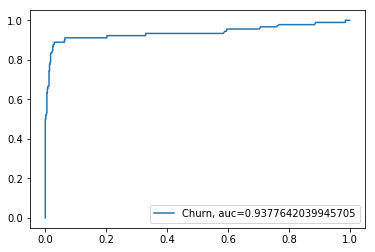

In [214]:
from sklearn import metrics
RF_Predictions_prob = RF_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, RF_Predictions_prob)
auc = metrics.roc_auc_score(Y_test, RF_Predictions_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend()

## KNN Classificaion

In [223]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)

In [224]:
KNN_Predictions = KNN_model.predict(X_test)

94.57013574660634 36.666666666666664


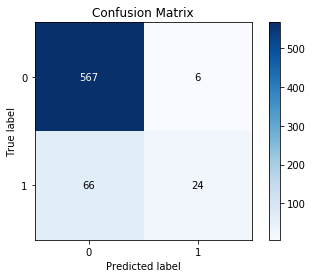

In [225]:
#confusion matrix
CM = pd.crosstab(Y_test, KNN_Predictions)
skplt.metrics.plot_confusion_matrix(Y_test, KNN_Predictions, normalize=False)

#let us save TP, TN, FP, FN



#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy_score= ((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
FN_rate= (FN*100)/(FN+TP)
print(accuracy_score, FN_rate)

## Naive Bais

In [826]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, Y_train)

In [827]:
NB_Predictions = NB_model.predict(X_test)

In [828]:
#Build confusion matrix
CM = pd.crosstab(Y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy_score= ((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
FN_rate= (FN*100)/(FN+TP)
print(accuracy_score, FN_rate)

61.085972850678736 36.666666666666664


In [860]:
df_train.Churn.value_counts()

No     2829
Yes     482
Name: Churn, dtype: int64

In [868]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
clffit= logreg.fit(X_train, Y_train)
Y_pred_logit = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, Y_test) * 100, 2)
print(acc_log_train)

86.63


In [870]:
CM = pd.crosstab(Y_test, Y_pred_logit)
CM

col_0,0,1
Churn,,
0,553,20
1,62,28


In [873]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)                   #87.63

#(FN*100)/(FN+TP)                             #68.88

87.63197586726999

In [230]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
#acc_svc

# model accuracy for X_test   
accuracy = svc.score(X_test, Y_test)
print(accuracy*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


88.68778280542986


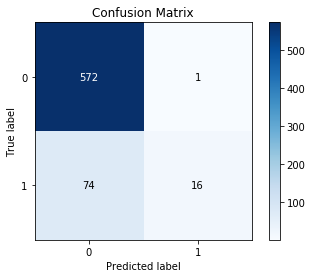

In [232]:
#Build confusion matrix
CM = pd.crosstab(Y_test, Y_pred_svc)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_svc, normalize=False)


#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)                             ##88.68

#(FN*100)/(FN+TP)                                          #82.22

# OVERSAMPLING

In [42]:
from imblearn.over_sampling import SMOTE

In [55]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(X_train, Y_train)

In [57]:
np.bincount(y_train)

array([2256, 2256], dtype=int64)

## decision Tree(oversampled)

In [241]:
C50_model_over = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
C50_Predictions_over = C50_model_over.predict(X_test)
print(np.unique(C50_Predictions_over)) 

[0 1]


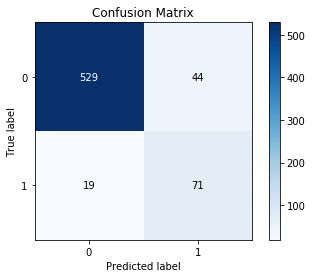

In [242]:
CM = pd.crosstab(Y_test, C50_Predictions_over)
skplt.metrics.plot_confusion_matrix(Y_test, C50_Predictions_over, normalize=False)


In [243]:
#accuracy_score(Y_test, C50_Predictions)*100
TP= 71
TN= 529
FN= 19
FP= 44
((TP+TN)*100)/(TP+TN+FP+FN)

90.49773755656109

In [244]:
#False Negative rate 
(FN*100)/(FN+TP) 

21.11111111111111

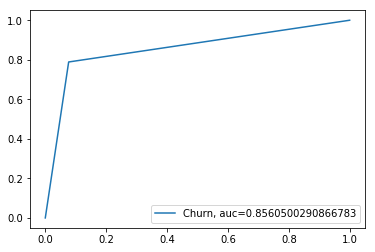

In [245]:
from sklearn import metrics
C50_Predictions_prob = C50_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  C50_Predictions_prob)
auc = metrics.roc_auc_score(Y_test, C50_Predictions_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest Oversampled

In [246]:
from sklearn.ensemble import RandomForestClassifier

RF_model_over = RandomForestClassifier(n_estimators = 1000).fit(x_train, y_train)
RF_Predictions_over = RF_model_over.predict(X_test)

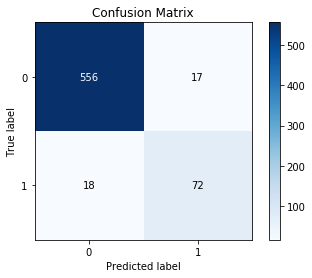

In [251]:
CM = pd.crosstab(Y_test, RF_Predictions)
skplt.metrics.plot_confusion_matrix(Y_test, RF_Predictions_over, normalize=False)
TP= 72
TN= 556
FP= 17
FN= 18


#((TP+TN)*100)/(TP+TN+FP+FN)           #94.41
#False Negative rate 
#(FN*100)/(FN+TP)                    #20 

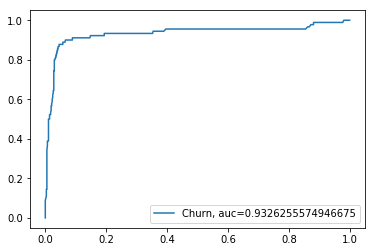

In [347]:
RF_Predictions_oversa_prob = RF_model_over.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  RF_Predictions_oversa_prob)
auc = metrics.roc_auc_score(Y_test, RF_Predictions_oversa_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Undersampling

In [254]:
from imblearn.under_sampling import NearMiss

In [255]:
nr = NearMiss()
X_train_und, y_train_und = nr.fit_sample(X_train, Y_train)

In [256]:
np.bincount(y_train_und)

array([392, 392], dtype=int64)

## Tree(Undersamled)

In [257]:
C50_model_un = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train_und, y_train_und)
C50_Predictions_un = C50_model_un.predict(X_test)
print(np.unique(C50_Predictions_un)) 

[0 1]


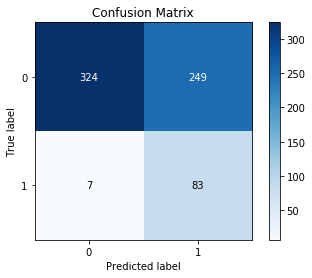

In [259]:
CM = pd.crosstab(Y_test, C50_Predictions_un)
skplt.metrics.plot_confusion_matrix(Y_test, C50_Predictions_un, normalize=False)


In [260]:
TP= 83
TN= 324
FN= 7
FP= 249




((TP+TN)*100)/(TP+TN+FP+FN)

61.38763197586727

In [261]:
#False Negative rate 
(FN*100)/(FN+TP)

7.777777777777778

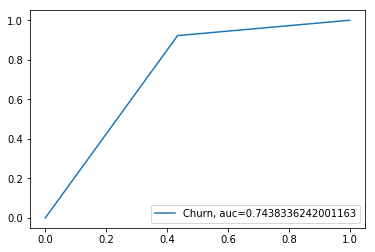

In [262]:
from sklearn import metrics
C50_Predictions_und_prob = C50_model_un.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, C50_Predictions_und_prob)
auc = metrics.roc_auc_score(Y_test, C50_Predictions_und_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend()

## Random Forest(Undersampling)

In [263]:
RF_model_unds = RandomForestClassifier(n_estimators = 500).fit(X_train_und, y_train_und)
RF_Predictions_unds = RF_model_unds.predict(X_test)

55.203619909502265

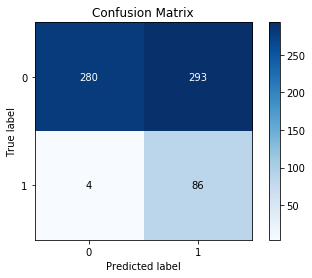

In [269]:
CM = pd.crosstab(Y_test,RF_Predictions_unds)
skplt.metrics.plot_confusion_matrix(Y_test, RF_Predictions_unds)
TP= 86
TN= 280
FP= 293
FN= 4

((TP+TN)*100)/(TP+TN+FP+FN)           #55.20
#False Negative rate 
#(FN*100)/(FN+TP)                     #4.44

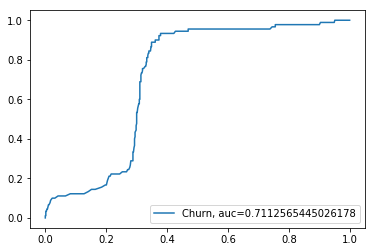

In [270]:
RF_Predictions_unds_prob = RF_model_unds.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  RF_Predictions_unds_prob)
auc = metrics.roc_auc_score(Y_test, RF_Predictions_unds_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [271]:
from imblearn.combine import SMOTETomek



In [282]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, Y_train)

C50_model_both = tree.DecisionTreeClassifier(criterion='entropy').fit(X_smt, y_smt)
C50_Predictions_both = C50_model_both.predict(X_test)
print(np.unique(C50_Predictions_both), np.bincount(y_smt)) 


[0 1] [2255 2255]


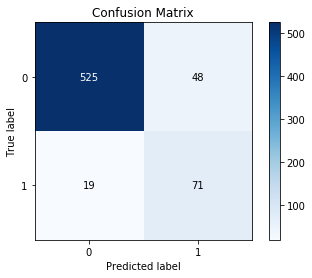

In [274]:
CM = pd.crosstab(Y_test, C50_Predictions_both)
skplt.metrics.plot_confusion_matrix(Y_test, C50_Predictions_both, normalize=False)


In [293]:

TP= 71
TN= 525
FP= 48
FN= 19
((TP+TN)*100)/(TP+TN+FP+FN)

89.894419306184

In [276]:
#False Negative rate 
(FN*100)/(FN+TP)

21.11111111111111

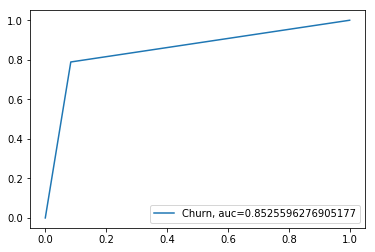

In [278]:
C50_model_both_prob = C50_model_both.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  C50_model_both_prob)
auc = metrics.roc_auc_score(Y_test, C50_model_both_prob)
plt.plot(fpr,tpr,label="Churn, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [279]:
RF_model_both = RandomForestClassifier(n_estimators = 500).fit(X_smt, y_smt)
RF_Predictions_both = RF_model_both.predict(X_test)

23.333333333333332

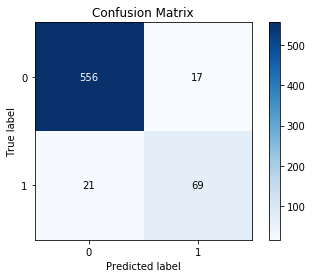

In [283]:
CM = pd.crosstab(Y_test,RF_Predictions_both)
skplt.metrics.plot_confusion_matrix(Y_test, RF_Predictions_both, normalize=False)

TP= 69
TN= 556
FP= 17
FN= 21


#((TP+TN)*100)/(TP+TN+FP+FN)           #94.41
#False Negative rate 
(FN*100)/(FN+TP)                       #23.33